<a href="https://colab.research.google.com/github/AkashKoley012/Computer-Vision-Projects/blob/main/Edge%20Detection%20using%20Computer%20Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# https://blog.roboflow.com/edge-detection/

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Sobel Edge Detection

array([[[  0,   0, 141],
        [  7,   0, 166],
        [ 20,   0, 197],
        ...,
        [  0,  10,  48],
        [  9,   2, 136],
        [ 24,   1, 217]],

       [[  0,   0, 142],
        [  8,   0, 167],
        [ 20,   0, 196],
        ...,
        [  0,   7,  55],
        [  8,   1, 136],
        [ 24,   0, 217]],

       [[  0,   0, 144],
        [  9,   2, 167],
        [ 18,   2, 193],
        ...,
        [  0,   6,  65],
        [  9,   1, 132],
        [ 22,   0, 206]],

       ...,

       [[ 27,  61,  51],
        [ 25,  59,  49],
        [ 34,  68,  58],
        ...,
        [ 17,  60,  49],
        [ 20,  63,  52],
        [ 22,  65,  54]],

       [[ 31,  65,  55],
        [ 36,  70,  60],
        [ 50,  84,  74],
        ...,
        [ 10,  58,  46],
        [ 13,  61,  49],
        [ 16,  64,  52]],

       [[ 28,  63,  53],
        [ 40,  74,  64],
        [ 58,  89,  80],
        ...,
        [  6,  59,  46],
        [  8,  61,  48],
        [ 11,  64,  51]]], dtype=uint8)
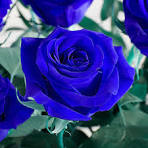

In [6]:
# Load the image
image_path = '/content/download.jpeg'  # Replace with your image path
image = cv2.imread(image_path)
image

array([[42, 50, 61, ..., 20, 43, 68],
       [42, 51, 61, ..., 21, 42, 68],
       [43, 52, 61, ..., 23, 41, 64],
       ...,
       [54, 52, 61, ..., 52, 55, 57],
       [58, 63, 77, ..., 49, 52, 55],
       [56, 67, 83, ..., 49, 51, 54]], dtype=uint8)
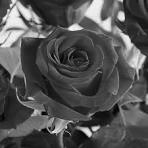

In [7]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image

array([[46, 51, 60, ..., 26, 43, 55],
       [47, 51, 60, ..., 27, 43, 55],
       [47, 52, 59, ..., 28, 42, 52],
       ...,
       [53, 54, 59, ..., 52, 55, 56],
       [59, 63, 70, ..., 50, 53, 54],
       [61, 67, 75, ..., 49, 52, 53]], dtype=uint8)
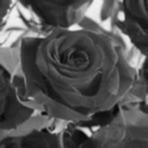

In [8]:
# Apply Gaussian smoothing (optional)
blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)
blurred_image

In [25]:
# Sobel operators
Gx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
Gx, Gy

(array([[  0.,  76.,  60., ...,  88., 190.,   0.],
        [  0.,  75.,  56., ...,  79., 183.,   0.],
        [  0.,  70.,  47., ...,  52., 159.,   0.],
        ...,
        [  0.,  31.,  40., ...,  19.,  22.,   0.],
        [  0.,  72.,  39., ...,  17.,  22.,   0.],
        [  0.,  92.,  36., ...,  16.,  22.,   0.]]),
 array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  6.,   5.,   0., ...,  11.,  -5., -12.],
        [  6.,   2.,  -7., ...,  16., -19., -36.],
        ...,
        [ 68.,  89., 112., ..., -19., -20., -20.],
        [ 34.,  54.,  71., ..., -13., -14., -14.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]))

In [26]:
# Gradient magnitude
G = np.sqrt(Gx**2 + Gy**2)
G

array([[  0.        ,  76.        ,  60.        , ...,  88.        ,
        190.        ,   0.        ],
       [  6.        ,  75.16648189,  56.        , ...,  79.76214641,
        183.06829327,  12.        ],
       [  6.        ,  70.0285656 ,  47.51841748, ...,  54.40588203,
        160.13119621,  36.        ],
       ...,
       [ 68.        ,  94.24436323, 118.92854998, ...,  26.87005769,
         29.73213749,  20.        ],
       [ 34.        ,  90.        ,  81.0061726 , ...,  21.40093456,
         26.07680962,  14.        ],
       [  0.        ,  92.        ,  36.        , ...,  16.        ,
         22.        ,   0.        ]])

In [27]:
# Normalize to range 0-255
Gx = np.uint8(255 * np.abs(Gx) / np.max(Gx))
Gy = np.uint8(255 * np.abs(Gy) / np.max(Gy))
G = np.uint8(255 * G / np.max(G))
Gx, Gy, G

(array([[ 0, 31, 24, ..., 36, 78,  0],
        [ 0, 30, 23, ..., 32, 75,  0],
        [ 0, 28, 19, ..., 21, 65,  0],
        ...,
        [ 0, 12, 16, ...,  7,  9,  0],
        [ 0, 29, 16, ...,  7,  9,  0],
        [ 0, 38, 14, ...,  6,  9,  0]], dtype=uint8),
 array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 2,  1,  0, ...,  4,  1,  4],
        [ 2,  0,  2, ...,  6,  7, 13],
        ...,
        [26, 34, 43, ...,  7,  7,  7],
        [13, 20, 27, ...,  5,  5,  5],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
 array([[ 0, 23, 18, ..., 27, 59,  0],
        [ 1, 23, 17, ..., 24, 57,  3],
        [ 1, 21, 14, ..., 16, 49, 11],
        ...,
        [21, 29, 37, ...,  8,  9,  6],
        [10, 28, 25, ...,  6,  8,  4],
        [ 0, 28, 11, ...,  4,  6,  0]], dtype=uint8))

In [12]:
# Display the results
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

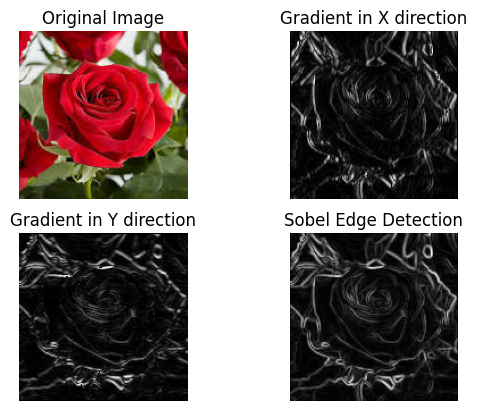

In [28]:
# Original image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Gradient in X direction
plt.subplot(2, 2, 2)
plt.imshow(Gx, cmap='gray')
plt.title('Gradient in X direction')
plt.axis('off')

# Gradient in Y direction
plt.subplot(2, 2, 3)
plt.imshow(Gy, cmap='gray')
plt.title('Gradient in Y direction')
plt.axis('off')

# Edge-detected image
plt.subplot(2, 2, 4)
plt.imshow(G, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.show()

# Canny Edge Detection


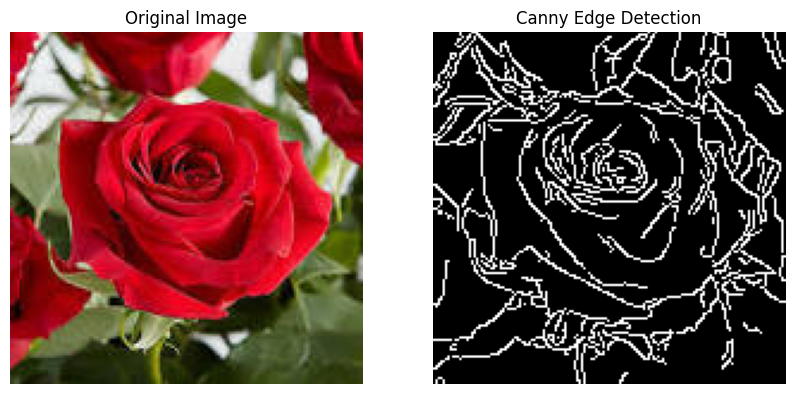

In [29]:
# Load the image
image_path = '/content/download.jpeg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 1.4)

# Apply Canny edge detector
edges = cv2.Canny(gray_image, 100, 200)

# Display the result
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()

# Laplacian Edge Detection

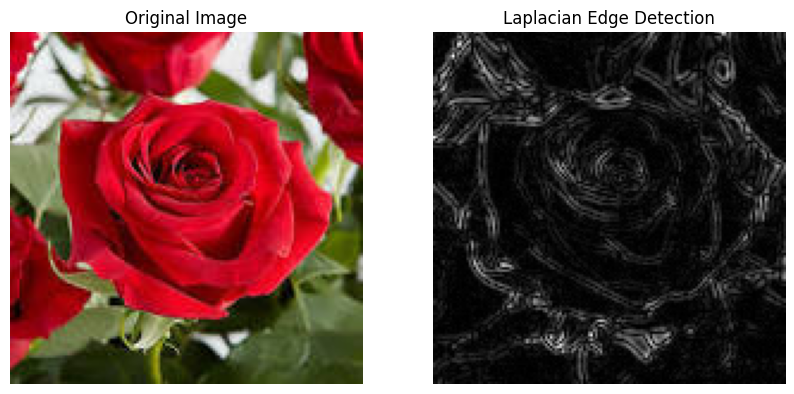

In [31]:
# Load the image
image_path = '/content/download.jpeg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Optional: Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

# Apply the Laplacian operator
laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)

# Convert the result to 8-bit (0-255) range
laplacian_abs = cv2.convertScaleAbs(laplacian)

# Display the result
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Laplacian edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.show()


# Prewitt Edge Detection

In [17]:
def prewitt_edge_detection(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply horizontal Prewitt kernel
    kernel_x = np.array([[-1, 0, 1],
                         [-1, 0, 1],
                         [-1, 0, 1]])
    horizontal_edges = cv2.filter2D(gray_image, -1, kernel_x)

    # Apply vertical Prewitt kernel
    kernel_y = np.array([[-1, -1, -1],
                         [0, 0, 0],
                         [1, 1, 1]])
    vertical_edges = cv2.filter2D(gray_image, -1, kernel_y)
    # Ensure both arrays have the same data type
    horizontal_edges = np.float32(horizontal_edges)
    vertical_edges = np.float32(vertical_edges)

    # Compute gradient magnitude
    gradient_magnitude = cv2.magnitude(horizontal_edges, vertical_edges)

    # Optional: Apply thresholding to highlight edges
    threshold = 50
    _, edges = cv2.threshold(gradient_magnitude, threshold, 255, cv2.THRESH_BINARY)

    return edges

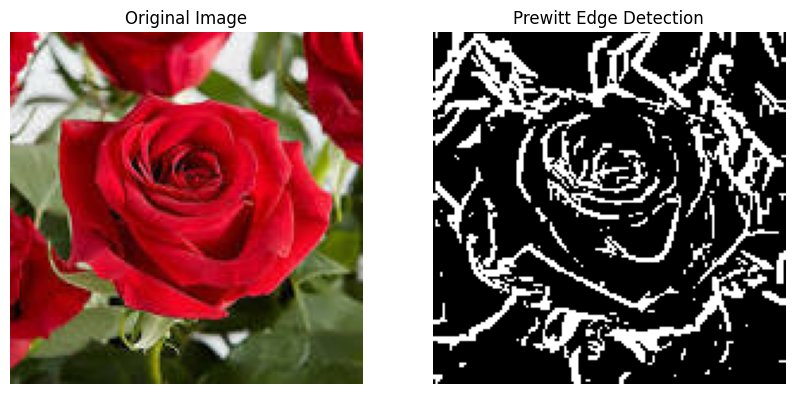

In [18]:
# Read the input image
image = cv2.imread('/content/download.jpeg')

# Apply Prewitt edge detection
edges = prewitt_edge_detection(image)

# Plotting both images using subplots
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Detected Edges
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.show()

# Roberts Cross Edge Detection

In [19]:
def roberts_cross_edge_detection(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Roberts Cross kernels
    kernel_x = np.array([[1, 0],
                         [0, -1]])
    kernel_y = np.array([[0, 1],
                         [-1, 0]])

    # Convolve the image with the kernels
    horizontal_edges = cv2.filter2D(gray_image, -1, kernel_x)
    vertical_edges = cv2.filter2D(gray_image, -1, kernel_y)

    # Ensure both arrays have the same data type
    horizontal_edges = np.float32(horizontal_edges)
    vertical_edges = np.float32(vertical_edges)

    # Compute gradient magnitude
    gradient_magnitude = cv2.magnitude(horizontal_edges, vertical_edges)

    # Apply thresholding to highlight edges
    threshold = 50
    _, edges = cv2.threshold(gradient_magnitude, threshold, 255, cv2.THRESH_BINARY)

    return edges

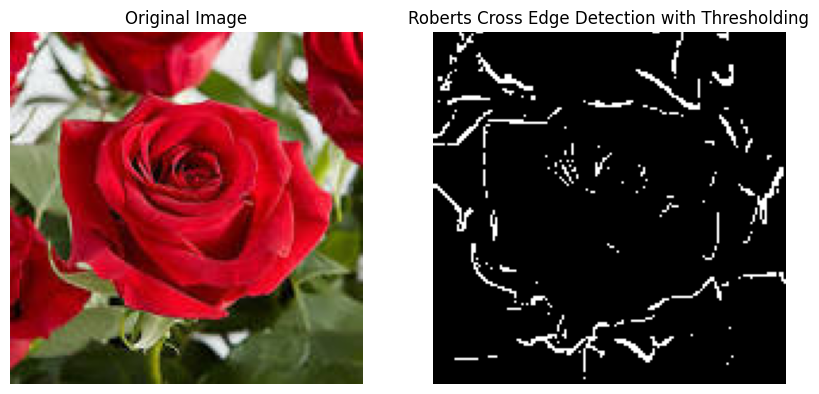

In [20]:
# Read the input image
image = cv2.imread('/content/download.jpeg')

# Apply Roberts Cross edge detection with thresholding
edges = roberts_cross_edge_detection(image)

# Plotting both images using subplots
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Detected Edges
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Roberts Cross Edge Detection with Thresholding')
plt.axis('off')

plt.show()

# Scharr Edge Detection

In [21]:
def scharr_edge_detection(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Scharr operator to find the x and y gradients
    Gx = cv2.Scharr(gray_image, cv2.CV_64F, 1, 0)
    Gy = cv2.Scharr(gray_image, cv2.CV_64F, 0, 1)

    # Compute the gradient magnitude
    gradient_magnitude = cv2.magnitude(Gx, Gy)

    return gradient_magnitude

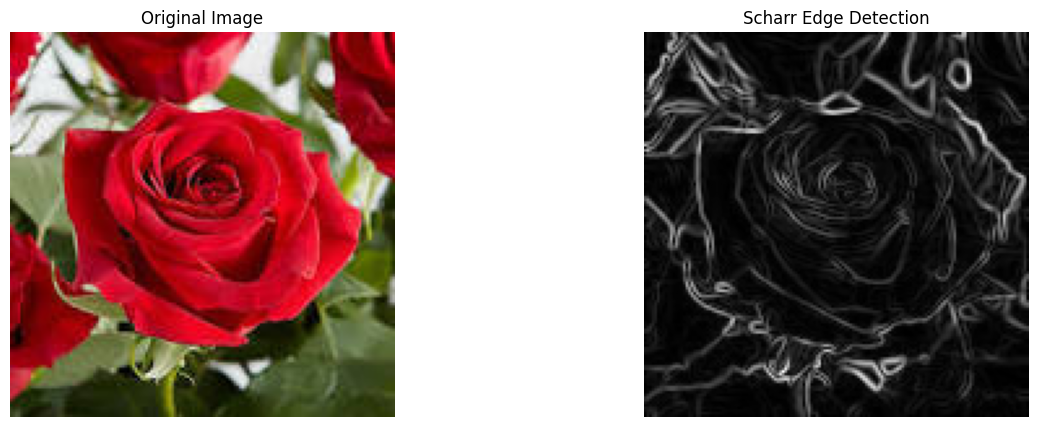

In [24]:
    # Load the image
    image = cv2.imread('/content/download.jpeg')

    # Detect edges using Scharr operator
    edges = scharr_edge_detection(image)

    # Plot the results
    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Scharr Edge Detection
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Scharr Edge Detection')
    plt.axis('off')

    plt.show()